In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy.io as sio
import time

import os
from sklearn.model_selection import train_test_split
# Tensorflow or PyTorch?
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.config.experimental.list_physical_devices('GPU')

[]

In [3]:
# MNIST Dataset
(mnist_X_train, mnist_y_train), (mnist_X_test, mnist_y_test) = keras.datasets.mnist.load_data()

mnist_X_train.shape, mnist_y_train.shape, mnist_X_test.shape, mnist_y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
mnist_X_train = mnist_X_train.astype('float32')
mnist_X_test = mnist_X_test.astype('float32')
mnist_X_train.dtype

dtype('float32')

In [5]:
def plot_digits(X, y=None, grid=None):
    if (X.ndim==2):
        fig, ax = plt.subplots()
        ax.imshow(X, cmap='gray')
        ax.axis('off')
        if (y is not None):
            ax.set_title('Label ' + str(y))
        plt.show()
    else:
        if (grid is None):
            fig, ax = plt.subplots(X.shape[0])
        else:
            fig, ax = plt.subplots(grid[0], grid[1])
        for i in range(X.shape[0]):
            ax.flatten()[i].imshow(X[i], cmap='gray')
            ax.flatten()[i].axis('off')
            if (y is not None):
                ax.flatten()[i].set_title('Label ' + str(y[i]))
        plt.show()
        
def plot_color_digits(X, y=None, grid=None):
    if (X.ndim==3):
        fig, ax = plt.subplots()
        ax.imshow(X)
        ax.axis('off')
        if (y is not None):
            ax.set_title('Label ' + str(y))
        plt.show()
    else:
        if (grid is None):
            fig, ax = plt.subplots(X.shape[0])
        else:
            fig, ax = plt.subplots(grid[0], grid[1])
        for i in range(X.shape[0]):
            ax.flatten()[i].imshow(X[i])
            ax.flatten()[i].axis('off')
            if (y is not None):
                ax.flatten()[i].set_title('Label ' + str(y[i]))
        plt.show()

In [6]:
mnist_0_4 = np.nonzero(mnist_y_train < 5)[0]
mnist_5_9 = np.nonzero(mnist_y_train >= 5)[0]

In [7]:
#same apply to test
mnist_0_4t = np.nonzero(mnist_y_test < 5)[0]
mnist_5_9t = np.nonzero(mnist_y_test >= 5)[0]

In [8]:
mnist_X_train = mnist_X_train[:, :, :, np.newaxis]
mnist_X_train = tf.broadcast_to(mnist_X_train, mnist_X_train.shape[:-1] + (3,))
mnist_X_train = tf.image.resize(mnist_X_train, (32,32))

In [9]:
#same apply  test
mnist_X_test = mnist_X_test[:, :, :, np.newaxis]
mnist_X_test = tf.broadcast_to(mnist_X_test, mnist_X_test.shape[:-1] + (3,))
mnist_X_test = tf.image.resize(mnist_X_test, (32,32))

In [10]:
mnist_X_train = mnist_X_train / 255.0
tf.math.reduce_min(mnist_X_train), tf.math.reduce_max(mnist_X_train)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

In [11]:
#same apply to test
mnist_X_test = mnist_X_test / 255.0

In [12]:
semeion = np.loadtxt(os.path.join('semeion.data'))
semeion_X = semeion[:,:256].reshape((-1,16,16))
semeion_y = np.argmax(semeion[:,256:],axis=1)
(semeion_X_train, semeion_X_test,
 semeion_y_train, semeion_y_test) = train_test_split(semeion_X, semeion_y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=semeion_y)

In [13]:
semeion_X_train.shape, semeion_y_train.shape, semeion_X_test.shape, semeion_y_test.shape

((1274, 16, 16), (1274,), (319, 16, 16), (319,))

In [14]:
semeion_0_4 = np.nonzero(semeion_y_train < 5)[0]
semeion_5_9 = np.nonzero(semeion_y_train >= 5)[0]
semeion_0_4t = np.nonzero(semeion_y_test < 5)[0]
semeion_5_9t = np.nonzero(semeion_y_test >= 5)[0]


In [15]:
semeion_X_train = semeion_X_train[:, :, :, np.newaxis]
semeion_X_train = tf.broadcast_to(semeion_X_train, semeion_X_train.shape[:-1] + (3,))
semeion_X_train = tf.image.resize(semeion_X_train, (32,32))
semeion_X_train.shape

TensorShape([1274, 32, 32, 3])

In [16]:
semeion_X_test = semeion_X_test[:, :, :, np.newaxis]
semeion_X_test = tf.broadcast_to(semeion_X_test, semeion_X_test.shape[:-1] + (3,))
semeion_X_test = tf.image.resize(semeion_X_test, (32,32))
semeion_X_test.shape

TensorShape([319, 32, 32, 3])

In [17]:
tf.math.reduce_min(semeion_X_train), tf.math.reduce_max(semeion_X_train)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

In [18]:
def FeatureEncoder(name=None):
    '''
    Return a Feature Encoder.
    '''
    fe_input = keras.Input(shape=(32,32,3))
    x = keras.layers.Dropout(0.2)(fe_input)
    x = keras.layers.Conv2D(filters=64, kernel_size=5, strides=1,
                                   padding='valid', activation='relu')(x)
    x = keras.layers.MaxPooling2D(2, strides=2)(x)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Conv2D(filters=64, kernel_size=5, strides=1,
                                   padding='valid', activation='relu')(x)
    x = keras.layers.MaxPooling2D(2, strides=2)(x)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Conv2D(filters=128, kernel_size=5, strides=1,
                                   padding='valid', activation='relu')(x)
    fe_out = keras.layers.Flatten()(x)
    if (name is None):
        fe = keras.Model(inputs=fe_input, outputs=fe_out, name='FeatureExtractor')
    else:
        fe = keras.Model(inputs=fe_input, outputs=fe_out, name=name)
    return fe

In [19]:
def ClassificationNet(name=None):
    '''
    Return a Classification Network.
    Input: None.
    Output: A tuple containing the handle of input layer and output layer.
    '''
    cl_input = keras.Input(shape=[128])
    x = keras.layers.Dense(128, activation='relu')(cl_input)
    cl_out = keras.layers.Dense(5, activation='relu')(x)
    if (name is None):
        cl = keras.Model(inputs=cl_input, outputs=cl_out, name='ClassificationNetwork')
    else:
        cl = keras.Model(inputs=cl_input, outputs=cl_out, name=name)
    return cl

In [20]:
def flip_gradient(x, l=1.0):
    positive_path = tf.stop_gradient(x * tf.cast(1 + l, tf.float32))
    negative_path = -x * tf.cast(l, tf.float32)
    return positive_path + negative_path

In [21]:
def DomainNet(name=None):
    '''
    Return a Domain Classification Network.
    Input: None.
    Output: A tuple containing the handle of input layer and output layer.
    '''
    dl_input = keras.Input(shape=[128])
    x = keras.layers.Dense(128, activation='relu')(dl_input)
    '''source/target, output shape = 2'''
    dl_out = keras.layers.Dense(2, activation='relu')(x)
    if (name is None):
        dl = keras.Model(inputs=dl_input, outputs=dl_out, name='DomainClassificationNetwork')
    else:
        dl = keras.Model(inputs=dl_input, outputs=dl_out, name=name)
    return dl

In [22]:
# Input layer
grl_input_src = keras.Input(shape=(32,32,3), name="SourceInput")
grl_input_tgt = keras.Input(shape=(32,32,3), name="TargetInput")
"no source input skip"

# Fed to the same feature extractor
grl_fe = FeatureEncoder()
grl_fe_src = grl_fe(grl_input_src)
grl_fe_tgt = grl_fe(grl_input_tgt)

# Source representation flows to the classification network
grl_out_cl = ClassificationNet()(grl_fe_src)

# Flip the gradient when backpropagating through this operation
grl_fe_src_feat = flip_gradient(grl_fe_src,1.0)#!!uncertain about self.l
grl_fe_tgt_feat = flip_gradient(grl_fe_tgt,1.0)

# Domain prediction
grl_dc = DomainNet()
grl_out_d_src = grl_dc(grl_fe_src_feat)
grl_out_d_tgt = grl_dc(grl_fe_tgt_feat)

# Final model
mod_grl = keras.Model(
    inputs=[grl_input_src, grl_input_tgt],
    outputs=[grl_out_cl,   # Categorical Classifier
             grl_out_d_src, # Sourve Domain Predictor
             grl_out_d_tgt] # Target Domain Preductor
)




In [23]:
def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return tf.gather(X, idx), tf.gather(y, idx)

In [24]:
def print_status_bar(iteration, total, loss=None):
    if (loss is not None):
        metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                             for m in loss])
    else:
        metrics = 'No loss available'
    end = "" if iteration < total else "\n"
    print("\r{}/{} - ".format(iteration, total) + metrics,
          end=end)

In [25]:
def train_grl_model(model, X_src, y_src, X_tgt, y_tgt, optimizers, batch_size=64, name=None):
    # Get the sample size, number of steps, source size, and target size
    
    n_samples = max(len(X_src), len(X_tgt))
    n_steps = n_samples // batch_size
    src_size = batch_size
    tgt_size = batch_size

    # Define loss functions
    layers = model.layers
    cat_loss = keras.losses.CategoricalCrossentropy()
    bin_loss = keras.losses.BinaryCrossentropy()
    
    
    # Define loss metrics and the history tracker
    loss_name = ['loss_ce','loss_domain','loss_f_total']
    mean_loss = []
    for l in loss_name:
        mean_loss.append(keras.metrics.Mean(name=l))
    history = [loss_name]
    
    for step in range(1, n_steps + 1):
        # Sample a batch from source and target data
        X_src_batch, y_src_batch = random_batch(X_src, y_src, src_size)
        X_tgt_batch, y_tgt_batch = random_batch(X_tgt, y_tgt, tgt_size)
        with tf.GradientTape(persistent=True) as tape:
            # Feed-forward Network
            outputs = model((X_src_batch, X_tgt_batch), training=True)
            # Separate the outputs
            out_c1 = outputs[0]
            d_src = outputs[1]
            d_tgt = outputs[2]
            #out_c1, d_src, d_tgt = outputs
            
            #Calculate the losses
            loss_ce = cat_loss(tf.one_hot(y_src_batch,5), keras.activations.softmax(out_c1))
            loss_domain = (bin_loss(tf.constant([[1.]] * src_size), d_src) +
                           bin_loss(tf.constant([[1.]] * tgt_size), d_tgt))
            loss_f_total = loss_ce + loss_domain
        
        gradient_fe = tape.gradient(loss_f_total,
                model.get_layer('FeatureExtractor').trainable_variables)
        optimizers[0].apply_gradients(zip(gradient_fe,
                model.get_layer('FeatureExtractor').trainable_variables))
        gradient_ce = tape.gradient(loss_ce,
                model.get_layer('ClassificationNetwork').trainable_variables)
        optimizers[1].apply_gradients(zip(gradient_ce,
                model.get_layer('ClassificationNetwork').trainable_variables))
        gradient_domain = tape.gradient(loss_domain,
                model.get_layer('DomainClassificationNetwork').trainable_variables)
        optimizers[2].apply_gradients(zip(gradient_domain,
                model.get_layer('DomainClassificationNetwork').trainable_variables))
           
           
        mean_loss[0](loss_ce)
        mean_loss[1](loss_domain)
        mean_loss[2](loss_f_total)
            
        # Print Status Bar
        print_status_bar(step * batch_size, n_samples, mean_loss)

        # Save the history
        history.append([m.result() for m in mean_loss])
            
        # Delete the tape
        del(tape)
    print_status_bar(n_samples, n_samples, mean_loss)
    return history

In [26]:
def model_output(model, X_src_batch, X_tgt_batch):
    src_size = len(X_src_batch)
    tgt_size = len(X_tgt_batch)


    # Feed-forward Network
    outputs = model((X_src_batch, X_tgt_batch))
    
    # Separate the outputs
    out_c1, d_src, d_tgt = outputs
    return out_c1, d_src, d_tgt
   

In [27]:
def novelty_detector(model, X, c_softmax=1.0, c_gloss=1.0, c_dscore=1.0):
    '''
    A novelty detector based on proposed method. Output a score based on maximum softmax probability,
    generator loss, and discriminator score.
    '''
    batch_size = 64
    n_batch = len(X) // batch_size
    softmax_score = np.array([]).reshape(0)
    
    
    for i in range(n_batch):
        s = i * batch_size
        e = (i+1) * batch_size
        outputs = mod_grl((X[s:e], X[s:e]))
        out_c1, d_src, d_tgt= outputs
        
        softmax_score = np.concatenate((softmax_score,
            tf.math.reduce_max(tf.nn.softmax(out_c1),
                               axis=1)))
        
        
        print_status_bar(i * batch_size, len(X))
    
    s = n_batch * batch_size
    e = len(X)
    outputs = mod_grl((X[s:e], X[s:e]))
    out_c1, d_src, d_tgt= outputs

    softmax_score = np.concatenate((softmax_score,
        tf.math.reduce_max(tf.nn.softmax(out_c1),
                           axis=1)))
    
    
    print_status_bar(len(X), len(X))
    
    return softmax_score

In [28]:
from sklearn.metrics import roc_curve, auc
def plot_auc_curve(fpr, tpr, ax):
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color='darkorange',
             lw=2.0, label='ROC curve (area = %0.3f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='gray', lw=1.0, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

# mnist->semeion

In [29]:
opt5 = []
for i in range(3):
    opt5.append(keras.optimizers.Adam(learning_rate=0.0001))
history5 = train_grl_model(mod_grl, X_src = tf.gather(mnist_X_train, mnist_0_4),
                          y_src = tf.gather(mnist_y_train, mnist_0_4),
                          X_tgt = tf.gather(semeion_X_train, semeion_0_4),
                          y_tgt = tf.gather(semeion_y_train, semeion_0_4),
                          optimizers = opt5, batch_size=64, name='mnist-semeion')

30596/30596 - loss_ce: 1.0452 - loss_domain: 30.7994 - loss_f_total: 31.8447


In [40]:
#novelty detector on target test
X_origin = tf.gather(semeion_X_train, semeion_0_4)
X_novel = tf.gather(semeion_X_train, semeion_5_9)
len_origin = len(X_origin)
len_novel = len(X_novel)
X_tgt = tf.concat((X_origin, X_novel), axis=0)
y_tgt5 = tf.constant([[0.]] * len_origin + [[1.]] * len_novel)
mnist_semeion = novelty_detector(mod_grl, X_tgt)

1274/1274 - No loss available


In [41]:
mnist_semeion

array([0.56007779, 0.39528462, 0.73747307, ..., 0.2       , 0.2       ,
       0.31388646])

Text(0.5, 1.0, 'MNIST to Semeion softmax test')

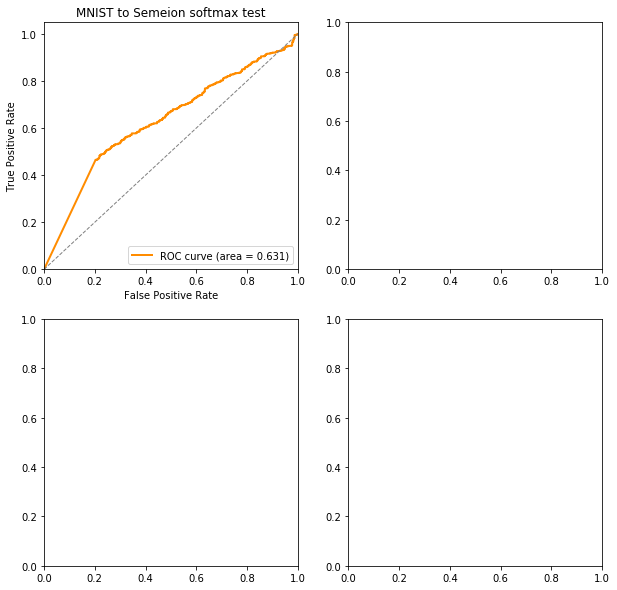

In [42]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
fpr, tpr, _ = roc_curve(y_tgt5, -mnist_semeion)
plot_auc_curve(fpr, tpr, ax[0,0])
ax[0,0].set_title('MNIST to Semeion softmax test')

In [33]:
index = np.random.randint(0, min(len(mnist_0_4), len(semeion_0_4)), 10)
X_src, X_tgt = (tf.gather(mnist_X_train, mnist_0_4[index]), 
                tf.gather(semeion_X_train, semeion_0_4[index]))
y_src, y_tgt = (tf.gather(mnist_y_train, mnist_0_4[index]),
                tf.gather(semeion_y_train, semeion_0_4[index]))
(out_c1, d_src, d_tgt) = model_output(mod_grl, X_src, X_tgt)

In [34]:
tf.nn.softmax(out_c1), tf.math.argmax(out_c1,axis=1), y_src

(<tf.Tensor: shape=(10, 5), dtype=float32, numpy=
 array([[0.0042503 , 0.9800253 , 0.00722373, 0.0042503 , 0.0042503 ],
        [0.0664812 , 0.0664812 , 0.73407525, 0.0664812 , 0.0664812 ],
        [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
        [0.88599056, 0.02850238, 0.02850238, 0.02850238, 0.02850238],
        [0.0177763 , 0.0177763 , 0.9288949 , 0.0177763 , 0.0177763 ],
        [0.982429  , 0.00439269, 0.00439269, 0.00439269, 0.00439269],
        [0.9796617 , 0.0050846 , 0.0050846 , 0.0050846 , 0.0050846 ],
        [0.9927441 , 0.00181403, 0.00181403, 0.00181403, 0.00181403],
        [0.00541104, 0.00541104, 0.9783558 , 0.00541104, 0.00541104],
        [0.00734382, 0.9706246 , 0.00734382, 0.00734382, 0.00734382]],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int64, numpy=array([1, 2, 0, 0, 2, 0, 0, 0, 2, 1])>,
 <tf.Tensor: shape=(10,), dtype=uint8, numpy=array([1, 2, 3, 0, 2, 0, 0, 0, 2, 1], dtype=uint8)>)